In [ ]:
%load_ext autoreload
%autoreload 2

# Necessary packages
import xarpes
import numpy as np
import matplotlib.pyplot as plt
import os

# Default plot configuration from xarpes.plotting.py
xarpes.plot_settings('default')

In [ ]:
#startx = 0.136561 (1/Ang),	deltax = 0.000513 (1/Ang)
#starty = -0.274858 (eV),	deltay = 0.000633  (eV)

kmin = 0.136561; kstp = 0.000513; knum = 273
emin  = -0.274858; estp = 0.000633; enum = 696

hnu_minPhi = 1.6297

kran = kmin + np.arange(knum) * kstp
eran = emin + np.arange(enum) * estp

ekin = eran + hnu_minPhi

intensities = np.loadtxt(os.path.join('data_sets', 'fig1a_laser.txt')).T
# print(intensities.shape)

data are in energy relative to the EF and inverse Angstrom (calculated with EF = 1.6297eV, hv = 6.05 eV, work_function 4.5 eV). 

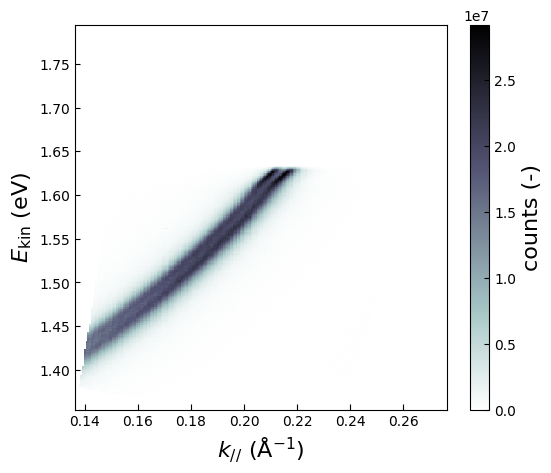

In [ ]:
%matplotlib inline

bmap = xarpes.BandMap.from_np_arrays(intensities=intensities, momenta=kran, ekin=ekin,
        energy_resolution=0.0025, momentum_resolution=0.003, temperature=6)

fig = bmap.plot(abscissa='momentum', ordinate='kinetic_energy', size_kwargs=dict(w=6, h=5))

The following cell shows that one can perform the Fermi-edge correction with momenta on the abscissa in theory.
It doesn't seem to be necessary for the current data set at all, making the slope much worse.

In [ ]:
# %matplotlib inline

# fig, ax = plt.subplots(2, 1, figsize=(6, 8))

# bmap.correct_fermi_edge(
#       hnuminPhi_guess=1.62, background_guess=1e3,
#       integrated_weight_guess=5e7, momentum_min=0.15, momentum_max=0.25,
#       ekin_min=1.6, ekin_max=1.65, true_angle=0.2,
#       ax=ax[0], show=False, fig_close=False)

# bmap.plot(ordinate='electron_energy', abscissa='momentum',
#       ax=ax[1], show=False, fig_close=False)

# # Figure customization
# ax[0].set_xlabel(''); ax[0].set_xticklabels([])
# ax[0].set_title('Fermi correction fit')
# fig.subplots_adjust(top=0.92, hspace=0.1)
# plt.show()

# print('The optimised hnu - Phi=' + f'{bmap.hnuminPhi:.4f}' + ' +/- '
#       + f'{1.96 * bmap.hnuminPhi_std:.5f}' + ' eV.')

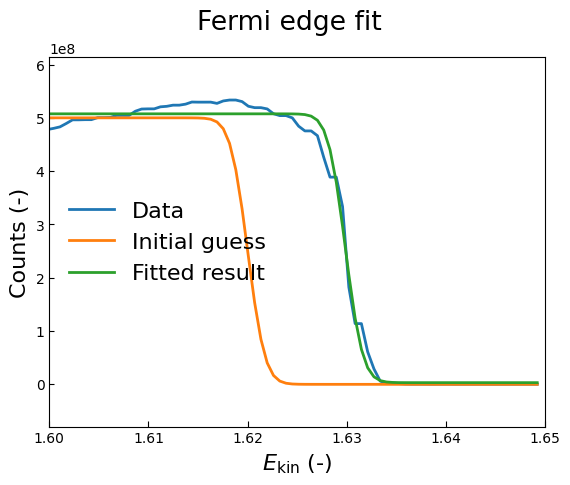

In [ ]:
%matplotlib inline

fig = bmap.fit_fermi_edge(hnuminPhi_guess=1.62, background_guess=1e1,
                          integrated_weight_guess=5e8,
                          momentum_min=0.2, momentum_max=0.22,
                          ekin_min=1.6, ekin_max=1.65,
                          show=True, title='Fermi edge fit')

print('The optimised hnu - Phi=' + f'{bmap.hnuminPhi:.4f}' + ' +/- '
      + f'{1.96 * bmap.hnuminPhi_std:.5f}' + ' eV.')

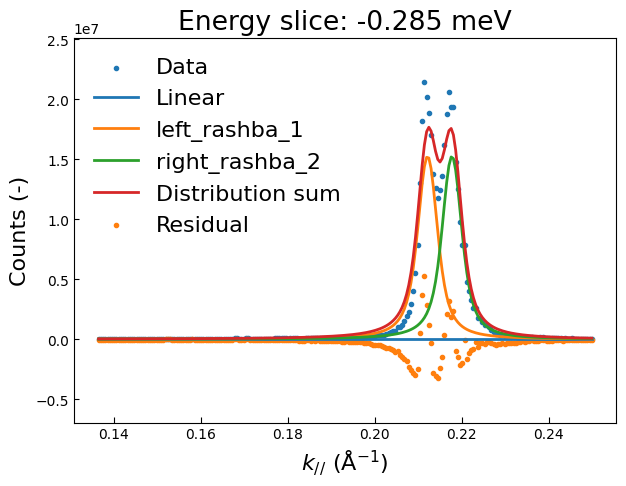

In [ ]:
%matplotlib inline

k_0 = 0.0028
peak = 0.215
amplitude = 6e4
broadening = 0.0008

abscissa_min = 0.10
abscissa_max = 0.25

energy_range = [-0.06, 0.001]
energy_value = 0.0

guess_dists = xarpes.CreateDistributions([
xarpes.Linear(offset=0, slope=0),
xarpes.MomentumQuadratic(amplitude=5e4, peak=peak, broadening=broadening,
                         center_wavevector=k_0*(-1),
                      name='left_rashba', index='1'),
xarpes.MomentumQuadratic(amplitude=5e4, peak=peak, broadening=broadening,
                         center_wavevector= k_0,
                      name='right_rashba', index='2'),
])

mdcs = xarpes.MDCs(*bmap.mdc_set(abscissa_min, abscissa_max, 
                                 energy_range=energy_range))

fig = plt.figure(figsize=(7, 5)); ax = fig.gca()

fig = mdcs.visualize_guess(distributions=guess_dists, energy_value=-0.000, ax=ax)

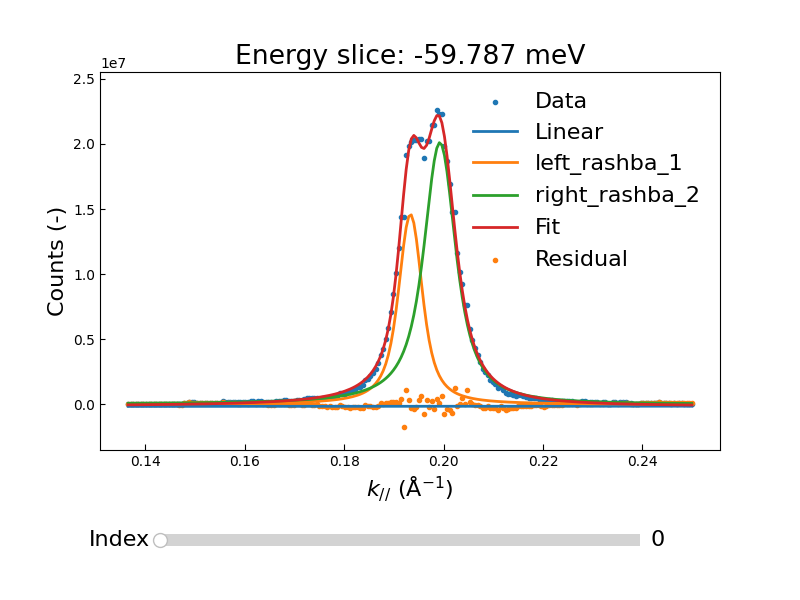

In [ ]:
%matplotlib widget    

fig = plt.figure(figsize=(8, 6)); ax = fig.gca()

fig = mdcs.fit_selection(distributions=guess_dists, ax=ax)

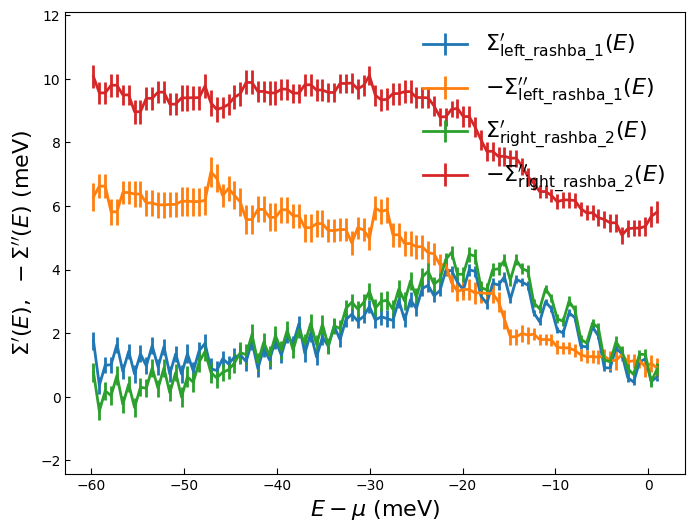

In [ ]:
%matplotlib inline

fig = plt.figure(figsize=(8, 6))
ax = fig.gca()

mass = 0.48
kfer = 0.215

self_one = xarpes.SelfEnergy(*mdcs.expose_parameters(select_label='left_rashba_1',
                                bare_mass=mass, fermi_wavevector=kfer))

self_two = xarpes.SelfEnergy(*mdcs.expose_parameters(select_label='right_rashba_2',
                                bare_mass=mass, fermi_wavevector=kfer))

self_one.plot_both(ax=ax, scale="meV", show=False, fig_close=False)
self_two.plot_both(ax=ax, scale="meV", show=False, fig_close=False)

plt.show()

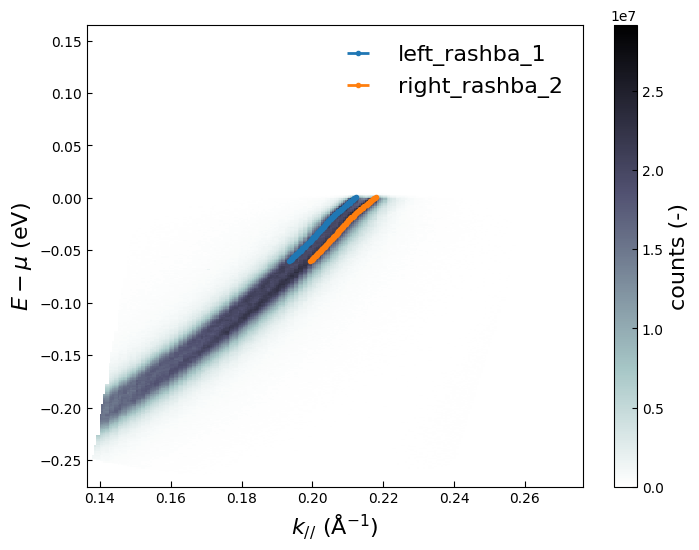

In [ ]:
%matplotlib inline

fig = plt.figure(figsize=(8, 6))
ax = fig.gca()

self_energies = xarpes.CreateSelfEnergies([self_one, self_two])

# plot_dispersions is not yet available for MomentumQuadratic

fig = bmap.plot(abscissa='momentum', ordinate='electron_energy', ax=ax,
                self_energies=self_energies) #, plot_dispersions='kink')